## Probas

### Carga de datos

In [8]:
from ConxuntoDatos import ConxuntoDatosOCT

conxuntoDatos = ConxuntoDatosOCT(ruta='../OCT-dataset', 
                                aumento_datos=True, 
                                particion='adestramento',
                                razon=0.9,
                                novo_tamano=(192, 544), 
                                anade_canny=True, 
                                anade_sobel=True, 
                                anade_laplacian=True,
                                anade_frangi=True)

In [9]:
tensor_im, mascara = conxuntoDatos[0]

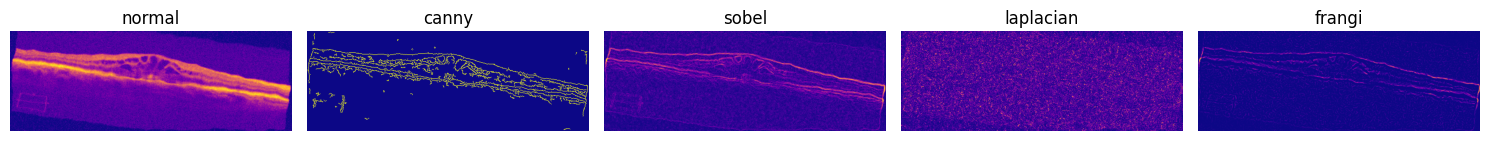

In [10]:
from utilidades import plot_tensor_channels

titles=['normal', 'canny', 'sobel', 'laplacian', 'frangi']
plot_tensor_channels(tensor_im, titles)

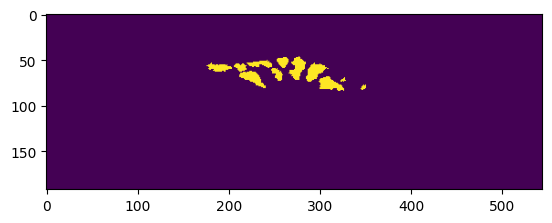

In [11]:
import matplotlib.pyplot as plt

mascara = mascara[0,:,:]
plt.imshow(mascara);